In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [145]:
df = pd.read_excel("winequality-white.xlsx", header=1)
df2 = pd.read_excel("winequality-red.xlsx", header=1)

In [146]:
# Formålet med analysen er at undersøge hvilke kemiske egenskaber der har størst sammenhæng med vinens kvalitetsscore.
# Datasættet indeholder både rød og hvid vin, og analysen fokuserer på forskelle mellem typerne samt hvilke uafhængige
# variabler (independent variables) der påvirker quality.

# Hypoteser:

# Alkoholprocent har en positiv sammenhæng med kvalitet.
# Density og volatile acidity har en negativ sammenhæng.
# Rød- og hvidvin er forskelligt fordelt på kvalitetsniveauer.

In [147]:
# Hvidvin
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [148]:
# Rødvin
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [149]:
# Hvidvin
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [150]:
# Rødvin
df2.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [151]:
# Hvidvin
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [152]:
# Rødvin
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [153]:
# Fjern duplicates fra hvidvin
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [154]:
# Fjern duplicates fra rødvin
df2.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [155]:
# Tildel dem en type (hhv. rød- og hvidvin) inden vi samler sættet med concat
df["type"] = "white"
df2["type"] = "red"

In [156]:
# Datasættene samles i én dataframe, så analyser kan foretages samlet, mens vinens type stadig bevares
wine = pd.concat([df, df2], ignore_index=True)

In [157]:
# Samlet overblik
wine.info()

<class 'pandas.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   str    
dtypes: float64(11), int64(1), str(1)
memory usage: 660.0 KB


In [158]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [159]:
# Antal vin af hver type
wine["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [160]:
# Dependent og independent variables
# Quality er dependent variable, da den repræsenterer resultatet vi ønsker at forklare.
# De øvrige variabler fungerer som uafhængige faktorer.
dependent_var = "quality"

independent_vars = [
    "alcohol",
    "density",
    "volatile acidity",
    "chlorides"
]

print("Dependent variable:", dependent_var)
print("Independent variables:", independent_vars)

Dependent variable: quality
Independent variables: ['alcohol', 'density', 'volatile acidity', 'chlorides']


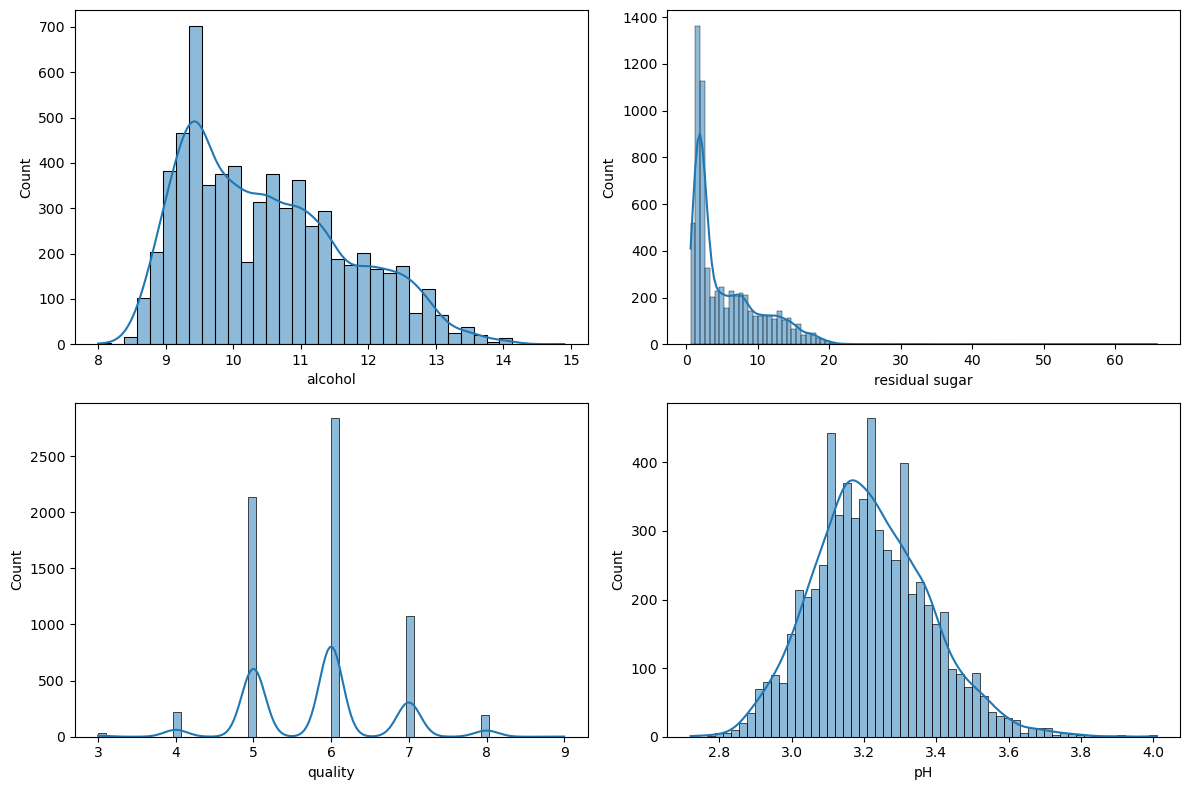

In [161]:
# Histogram over de ovenstående variabler
fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.histplot(wine["alcohol"], kde=True, ax=axes[0,0])
sns.histplot(wine["residual sugar"], kde=True, ax=axes[0,1])
sns.histplot(wine["quality"], kde=True, ax=axes[1,0])
sns.histplot(wine["pH"], kde=True, ax=axes[1,1])

plt.tight_layout()
plt.show()

In [162]:
# Alkoholniveau viser ikke klarer tegn på normalfordeling.
# Residual sugar er heller ikke en perfekt normalfordeling.
# Kvalitet er nogenlunde tæt på normalfordeling.
# pH-værdi viser en umiddelbart flot normalfordeling.

In [163]:
# Distributionsstatistik
wine[independent_vars + [dependent_var]].skew(numeric_only=True)

alcohol             0.565718
density             0.503602
volatile acidity    1.495097
chlorides           5.399828
quality             0.189623
dtype: float64

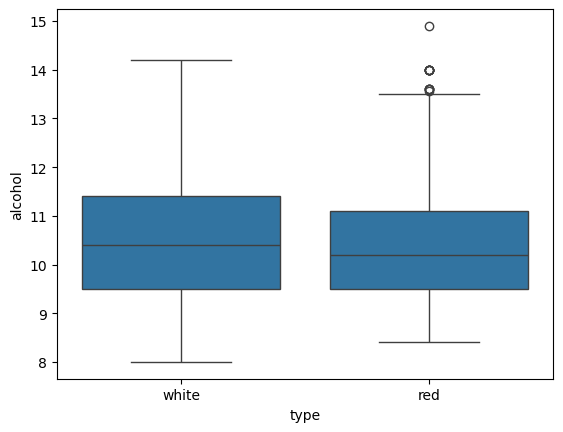

In [164]:
# Boxplot til at finde eventuelle outliers og danne overblik
# Outliers fjernes ikke permanent, men analyseres for at se om de påvirker fordelingen rent visuelt
sns.boxplot(data=wine, x="type", y="alcohol")
plt.show()

Q1 = wine["alcohol"].quantile(0.25)
Q3 = wine["alcohol"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

wine_no_outliers = wine[(wine["alcohol"]>=lower_limit) & (wine["alcohol"]<=upper_limit)]

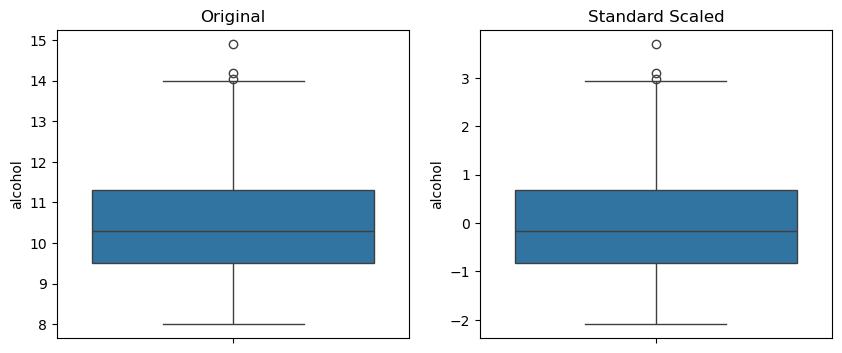

In [165]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.boxplot(data=wine, y="alcohol", ax=axes[0])
axes[0].set_title("Original")

sns.boxplot(data=wine_standard, y="alcohol", ax=axes[1])
axes[1].set_title("Standard Scaled")

plt.show()

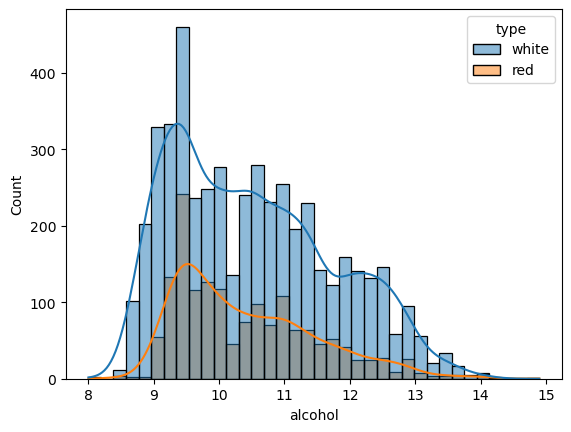

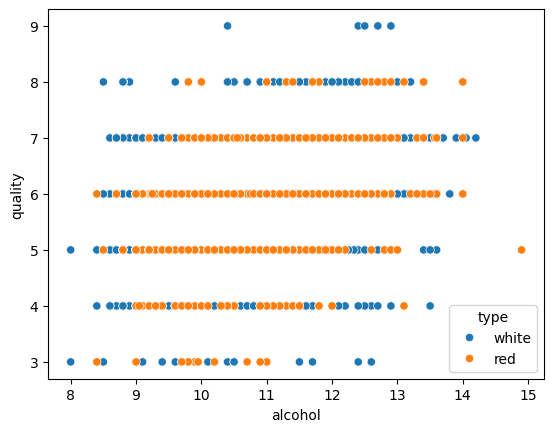

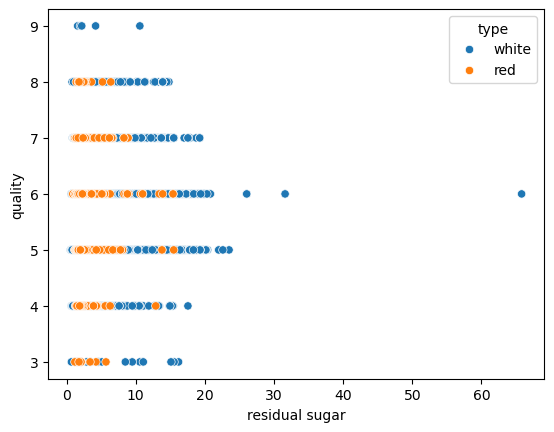

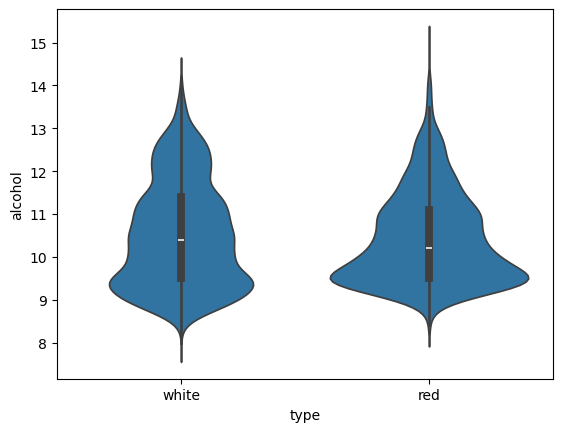

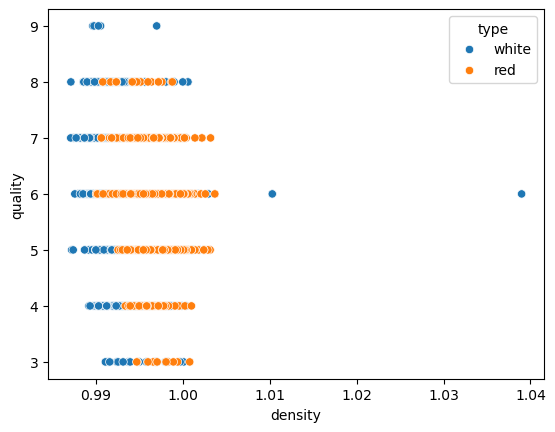

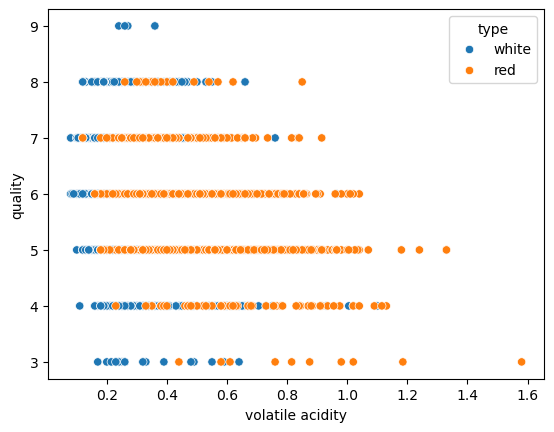

In [166]:
# Visualisering
sns.histplot(data=wine, x="alcohol", hue="type", kde=True)
plt.show()

sns.scatterplot(data=wine, x="alcohol", y="quality", hue="type")
plt.show()

sns.scatterplot(data=wine, x="residual sugar", y="quality", hue="type")
plt.show()

sns.violinplot(data=wine, x="type", y="alcohol")
plt.show()

sns.scatterplot(data=wine, x="density", y="quality", hue="type")
plt.show()

sns.scatterplot(data=wine, x="volatile acidity", y="quality", hue="type")
plt.show()

In [167]:
from sklearn.preprocessing import StandardScaler

numeric_cols = wine.select_dtypes(include="number").columns

scaler = StandardScaler()
wine_scaled = wine.copy()
wine_scaled[numeric_cols] = scaler.fit_transform(wine[numeric_cols])

In [168]:
# Et cool 3D scapper plot med alkohol, sukker og kvalitet som variabler
fig = px.scatter_3d(
    wine,
    x="alcohol",
    y="residual sugar",
    z="quality",
    color="type",
    opacity=0.7
)

fig.show()

pH_bin_5
(2.719, 2.978]    0.994801
(2.978, 3.236]    0.994679
(3.236, 3.494]    0.994688
(3.494, 3.752]    0.994887
(3.752, 4.01]     0.993582
Name: density, dtype: float64
pH_bin_10
(2.719, 2.849]    0.993112
(2.849, 2.978]    0.994882
(2.978, 3.107]    0.994706
(3.107, 3.236]    0.994664
(3.236, 3.365]    0.994515
(3.365, 3.494]    0.995044
(3.494, 3.623]    0.994942
(3.623, 3.752]    0.994640
(3.752, 3.881]    0.993888
(3.881, 4.01]     0.992665
Name: density, dtype: float64


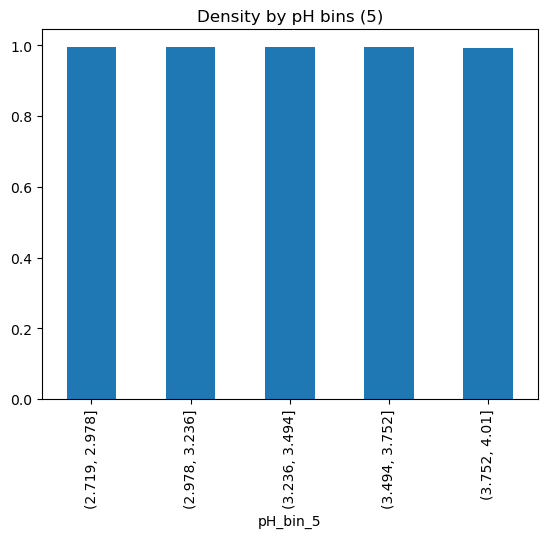

In [169]:
# Ved at opdele pH i bins kan vi undersøge hvordan density varierer med syreniveau.
# Flere bins giver mere detaljer, men også mere støj.
wine["pH_bin_5"] = pd.cut(wine["pH"], bins=5)
density_by_bin_5 = wine.groupby("pH_bin_5")["density"].mean()
print(density_by_bin_5)

wine["pH_bin_10"] = pd.cut(wine["pH"], bins=10)
density_by_bin_10 = wine.groupby("pH_bin_10")["density"].mean()
print(density_by_bin_10)

density_by_bin_5.plot(kind="bar", title="Density by pH bins (5)")
plt.show()

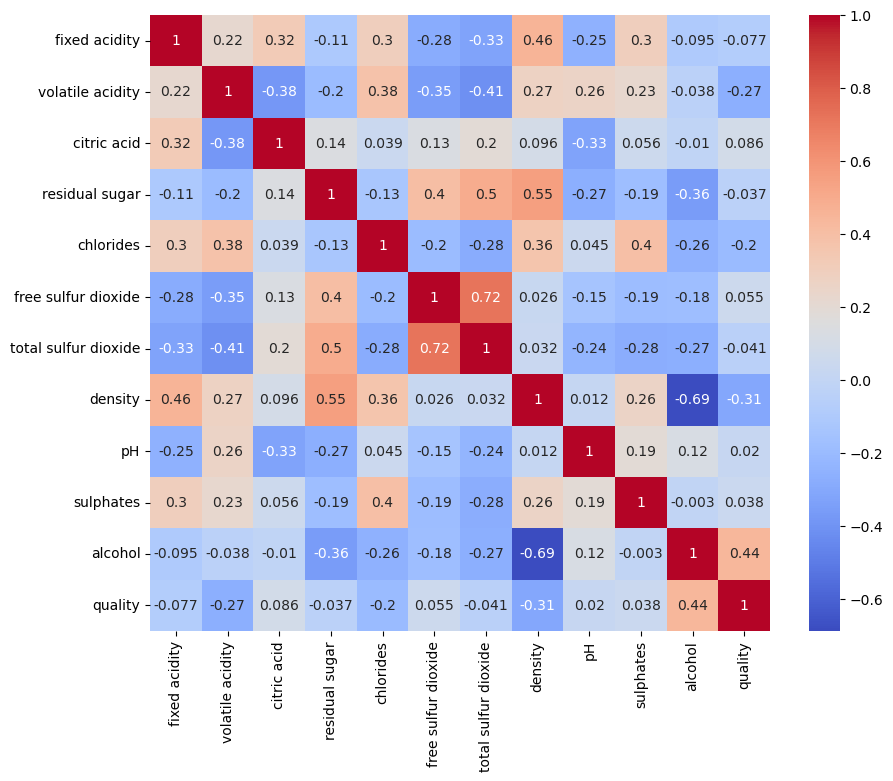

In [170]:
# Heatmap for correlationvisualisering
corr = wine.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

quality_corr = corr["quality"].sort_values()

In [171]:
# Alcohol viser den stærkeste positive korrelation med quality (~0.44).
# Density og volatile acidity viser moderat negativ sammenhæng.

In [172]:
print("\nTop positive correlations:")
print(quality_corr.head())

print("\nTop negative correlations:")
print(quality_corr.tail())


Top positive correlations:
density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
Name: quality, dtype: float64

Top negative correlations:
sulphates              0.038485
free sulfur dioxide    0.055463
citric acid            0.085532
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64


In [173]:
quality_corr = wine.corr(numeric_only=True)["quality"].sort_values(ascending=False)

selected_features = quality_corr[
    (quality_corr.index != "quality") &
    (abs(quality_corr) > 0.2)
]

print("Selected features for analysis:")
print(selected_features)

Selected features for analysis:
alcohol             0.444319
chlorides          -0.200666
volatile acidity   -0.265699
density            -0.305858
Name: quality, dtype: float64


In [174]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = wine.select_dtypes(include="number").columns

scaler = StandardScaler()
wine_standard = wine.copy()
wine_standard[numeric_cols] = scaler.fit_transform(wine[numeric_cols])

minmax = MinMaxScaler()
wine_minmax = wine.copy()
wine_minmax[numeric_cols] = minmax.fit_transform(wine[numeric_cols])

In [175]:
from scipy import stats
from scipy.stats import f_oneway

important_vars = ["alcohol", "density", "volatile acidity"]

for var in important_vars:

    print("\n---", var, "---")

    low_q = wine[wine["quality"] < 7][var]
    high_q = wine[wine["quality"] >= 7][var]

    t_stat, p = stats.ttest_ind(high_q, low_q, equal_var=False)
    print("T-test p-value:", p)

    groups = [
        wine[wine["quality"] == q][var]
        for q in wine["quality"].unique()
    ]

    f_stat, p_a = f_oneway(*groups)
    print("ANOVA p-value:", p_a)



--- alcohol ---
T-test p-value: 1.7856356097416815e-174
ANOVA p-value: 0.0

--- density ---
T-test p-value: 2.3065454864412307e-98
ANOVA p-value: 6.5816092695649136e-164

--- volatile acidity ---
T-test p-value: 3.2905987447341872e-52
ANOVA p-value: 8.168059238595844e-117


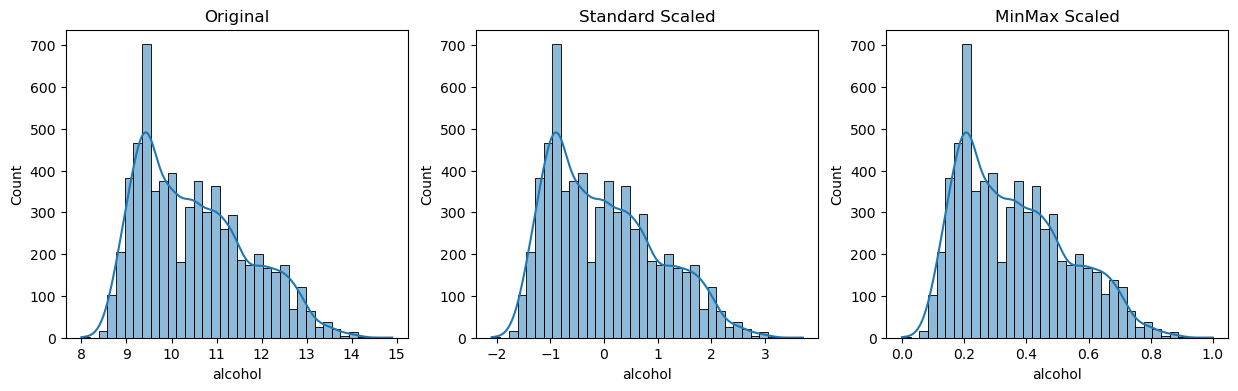

In [176]:
# Compare alcohol before vs after scaling

fig, axes = plt.subplots(1,3, figsize=(15,4))

sns.histplot(wine["alcohol"], kde=True, ax=axes[0])
axes[0].set_title("Original")

sns.histplot(wine_standard["alcohol"], kde=True, ax=axes[1])
axes[1].set_title("Standard Scaled")

sns.histplot(wine_minmax["alcohol"], kde=True, ax=axes[2])
axes[2].set_title("MinMax Scaled")

plt.show()


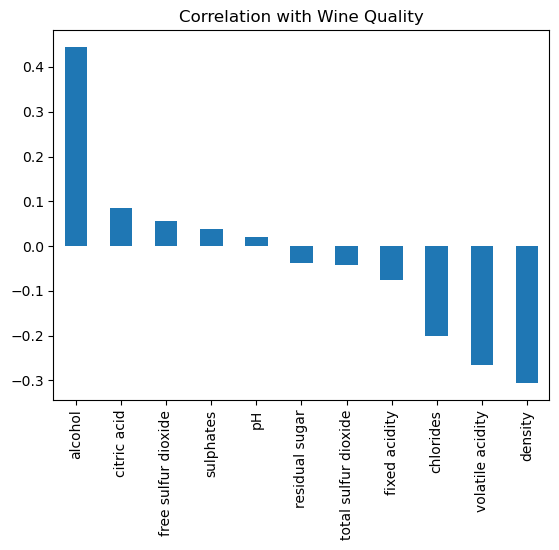

In [177]:
# God visualisering af korrelation mellem de divsere variabler ift. kvalitetscore
quality_corr.drop("quality").plot(kind="bar")
plt.title("Correlation with Wine Quality")
plt.show()

In [178]:
quality_corr = wine.corr(numeric_only=True)["quality"].sort_values(ascending=False)
print(quality_corr)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [179]:
# H0: Alkoholniveau er ens mellem lav og høj kvalitet
# H1: Alkoholniveau er forskelligt

low_quality = wine[wine["quality"] < 7]["alcohol"]
high_quality = wine[wine["quality"] >= 7]["alcohol"]

t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=False)

print("t-stat:", t_stat)
print("p-value:", p_value)

t-stat: 31.598465221460874
p-value: 1.7856356097416815e-174


In [180]:
# P-value < 0,05
# Da p-værdien er langt mindre end 0.05 forkastes H0.
# Der er en statistisk signifikant forskel i alkoholprocent mellem lav- og højkvalitets vine.
# Dette understøtter analysen fra scatterplots og korrelation, som viser at højere alkoholniveau generelt er
# forbundet med højere quality-score.

In [181]:
# H0: Alle quality-grupper har samme gennemsnitlige alkoholniveau
# H1: Mindst én quality-gruppe har et forskelligt gennemsnit

from scipy.stats import f_oneway

groups = [
    wine[wine["quality"] == q]["alcohol"]
    for q in wine["quality"].unique()
]

f_stat, p_value = f_oneway(*groups)

print("F-stat:", f_stat)
print("p-value:", p_value)

F-stat: 320.5934478029272
p-value: 0.0


In [182]:
# P-value < 0,05 
# ANOVA-testen viser en ekstremt signifikant forskel i alkoholniveau mellem quality-niveauer.
# Dette indikerer, at alkoholprocent varierer systematisk med vinens kvalitetsrating og ikke kun mellem to grupper.

In [183]:
# H0: Vinens type og kvalitetsgruppe er uafhængige 
# H1: Der er en sammenhæng mellem vinens type og kvalitetsniveau

from scipy.stats import chi2_contingency

wine["quality_group"] = pd.cut(
    wine["quality"],
    bins=[0,5,7,10],
    labels=["low","medium","high"]
)

contingency = pd.crosstab(wine["type"], wine["quality_group"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)

Chi-square: 103.66122419232227
p-value: 3.0920832129518044e-23


In [184]:
# P-value < 0,05, så vi forkaster nulhypotesen
# Der er en statistisk signifikant sammenhæng mellem vinens type (red/white) og quality-niveau.
# Altså, er rød- og hvidvine er ikke fordelt ens på kvalitetskalaen.

In [185]:
from scipy.stats import chi2_contingency

wine["alcohol_group"] = pd.cut(
    wine["alcohol"],
    bins=3,
    labels=["low","medium","high"]
)

cont = pd.crosstab(wine["alcohol_group"], wine["quality_group"])

chi2, p, dof, expected = chi2_contingency(cont)

print("Chi-square alcohol vs quality_group:", p)

Chi-square alcohol vs quality_group: 5.938684023587316e-219


In [186]:
# Density korrelationstests

In [187]:
low_q_d = wine[wine["quality"] < 7]["density"]
high_q_d = wine[wine["quality"] >= 7]["density"]

stats.ttest_ind(high_q_d, low_q_d, equal_var=False)

TtestResult(statistic=np.float64(-22.358525561987616), pvalue=np.float64(2.3065454864412307e-98), df=np.float64(1876.864766839068))

In [188]:
# ANOVA test density
groups_density = [
    wine[wine["quality"] == q]["density"]
    for q in wine["quality"].unique()
]

f_oneway(*groups_density)


F_onewayResult(statistic=np.float64(136.95123576696471), pvalue=np.float64(6.5816092695649136e-164))

In [189]:
# Volatile acidity korrelationstests

In [190]:
low_q_v = wine[wine["quality"] < 7]["volatile acidity"]
high_q_v = wine[wine["quality"] >= 7]["volatile acidity"]

stats.ttest_ind(high_q_v, low_q_v, equal_var=False)

TtestResult(statistic=np.float64(-15.5261688676099), pvalue=np.float64(3.2905987447341872e-52), df=np.float64(2793.943023775327))

In [191]:
groups_va = [
    wine[wine["quality"] == q]["volatile acidity"]
    for q in wine["quality"].unique()
]

f_oneway(*groups_va)

F_onewayResult(statistic=np.float64(96.67402209622018), pvalue=np.float64(8.168059238595844e-117))

In [192]:
# Producenter kan bruge alkoholniveau og syreprofil til at optimere kvalitetsscoren.
# Distributører kan anvende kemiske profiler til at kategorisere vine.
# Forbrugere kan forvente en vis sammenhæng mellem højere alkohol og højere kvalitet,
# men kvalitet afhænger stadig af flere faktorer samtidigt.